In [1]:
%matplotlib inline
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np
import pandas as pd
import os
import pathlib
import tensorflow as tf
import sklearn
from PIL import Image
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

SyntaxError: invalid syntax (760742688.py, line 16)

In [2]:
audio = "Funny-02.wav"
x, sr = librosa.load(audio, sr= 44100)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050


c:\Users\oskar\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: 'Funny-02.wav'

In [ ]:

ipd.Audio(audio)

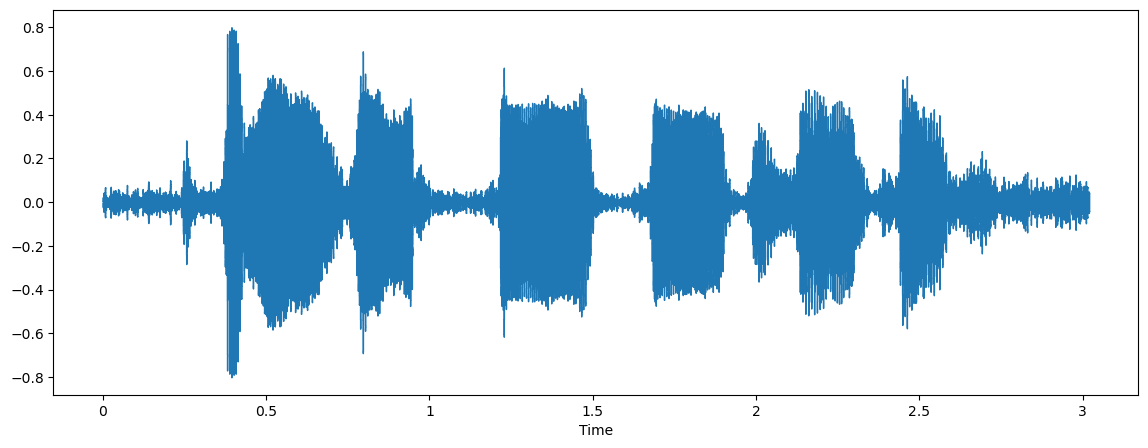

In [ ]:

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

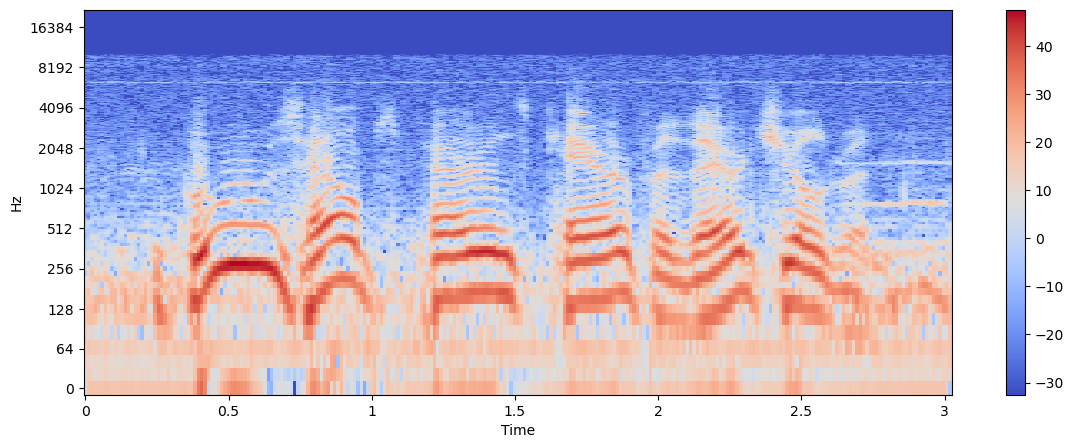

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

C:\Users\oskar\AppData\Local\Temp\ipykernel_16024\164628595.py:1: FutureWarning: Pass y=[-0.01884133 -0.02309282 -0.0202561  ... -0.01557099 -0.01525772
 -0.00790925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


(20, 261)


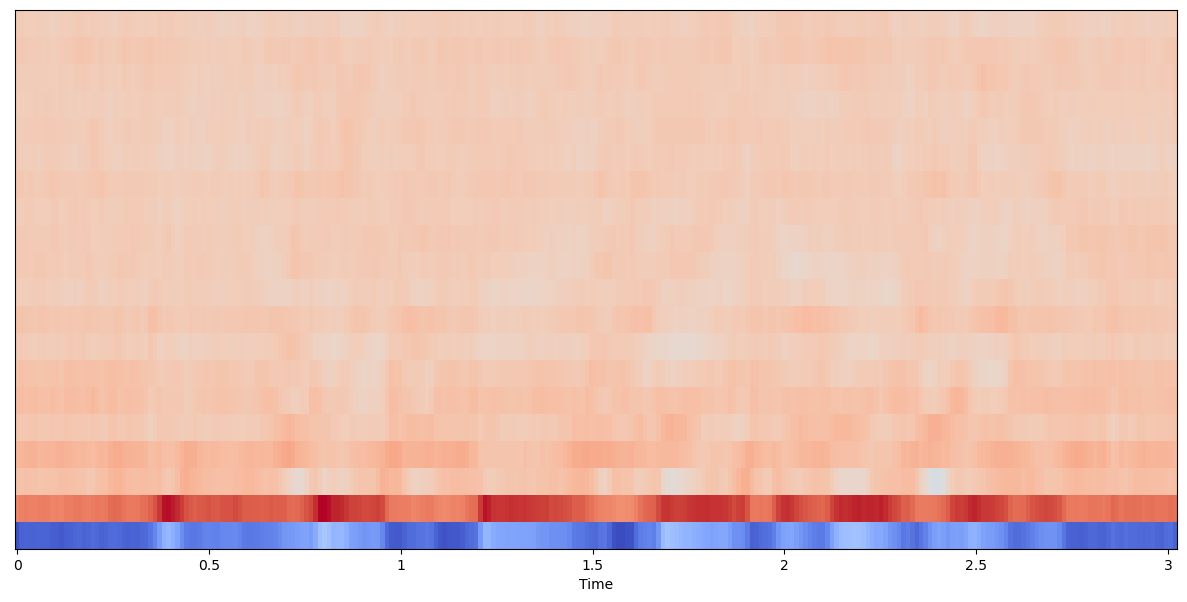

In [ ]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [61]:
'''EXTRACT SOUND DATA'''
states ='man woman'.split()
label = []
rms = []
chroma_stft = []
spec_cent = []
spec_bw = []
rolloff = []
zcr = []
MFCC = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for s in states:
   # pathlib.Path(f'sounds/{s}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'sounds/{s}'):
        sample = f'sounds/{s}/{filename}'
        y, sr = librosa.load(sample, mono=True, duration=5)
        label.append( 0 if s == 'man' else 1)
        mfcc = (librosa.feature.mfcc(y=y, sr=sr))
        i = 0
        for e in mfcc:
            MFCC[i].append(np.mean(e))
            i +=1
            

df_audio = {
    'label':label,
    # 'rmse': ,
    'chroma_stft':['a','b','c'],
    'spec_cent':['d','e','f'],
    'spec_bw':['g','h','i'],
    'rolloff':['j','k','l'],
    'zcr':['m','n','o'],
    'mfcc':MFCC
    
}
# print(librosa.feature.rms(x))
# df = pd.DataFrame(df_audio)
# print(df)
print(label)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [62]:
'''CREATE DATAFRAME'''
df = {}
df['label'] = label
for idx, mfcc in enumerate(MFCC):
    df['mfcc' + str(idx+1)] = mfcc
df = pd.DataFrame(df)
df.to_csv('out.csv')


In [65]:

#print(Y)
Y = np.asarray(df['label'].copy())
print(Y)
scaler = StandardScaler()
X = scaler.fit_transform( np.array(df.iloc[:, 1:], dtype = float,)).copy()
print(df.iloc[:,1:])
print(X)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=42)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
         mfcc1       mfcc2      mfcc3      mfcc4      mfcc5      mfcc6  \
0  -406.095947   86.563660   6.117679  12.148960  21.209312  -6.189775   
1  -250.864624  106.280190   7.406080  23.805054   4.830278   0.466797   
2  -190.162476  116.181587 -14.952666  60.889141  -8.826905   4.753458   
3  -174.734589  112.879990  -3.056041  23.421064   7.020376  14.658980   
4  -232.817307  143.433792  -4.361963  14.286151   8.547081  -8.059685   
5  -365.735992  110.294502 -19.584139  26.509691  25.327469   1.562878   
6  -359.171143  121.531075  -3.743634  14.030296  21.564688   5.319526   
7  -329.329620  125.811722   2.087454  28.271669   7.136318   2.410475   
8  -305.896698   70.478302 -15.819508  29.873825   1.611010  18.637300   
9  -261.207489  136.041855 -11.472735  16.003376  -8.326738  -7.205198   
10 -184.638321  100.044975 -18.313553  46.793968  12.482349   3.100498   
11 -276.762329   66.677849  21.650640  16.

In [66]:
print(x_train.shape[1])
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

20


In [72]:
gender_classifer = model.fit(x_train, y_train, epochs = 4,batch_size=16, validation_data = (x_test, y_test))
print(model.predict(X))
print(y_test)

Epoch 1/4
2/2 [==============================] - 0s 301ms/step - loss: 0.4370 - accuracy: 0.8800 - val_loss: 0.6798 - val_accuracy: 0.5556
Epoch 2/4
2/2 [==============================] - 0s 103ms/step - loss: 0.4288 - accuracy: 0.8800 - val_loss: 0.6763 - val_accuracy: 0.5556
Epoch 3/4
2/2 [==============================] - 0s 87ms/step - loss: 0.4199 - accuracy: 0.8800 - val_loss: 0.6721 - val_accuracy: 0.5556
Epoch 4/4
2/2 [==============================] - 0s 6ms/step
[[0.11994684]
 [0.47828943]
 [0.3397707 ]
 [0.1393659 ]
 [0.13828261]
 [0.12726183]
 [0.2110023 ]
 [0.09651041]
 [0.28097993]
 [0.53723943]
 [0.1553193 ]
 [0.08713917]
 [0.188024  ]
 [0.21200924]
 [0.3022482 ]
 [0.37451082]
 [0.231715  ]
 [0.56771517]
 [0.43261668]
 [0.6717525 ]
 [0.62580824]
 [0.4213928 ]
 [0.61919725]
 [0.68958646]
 [0.3031154 ]
 [0.6277331 ]
 [0.6050308 ]
 [0.40644044]
 [0.56789726]
 [0.60270494]
 [0.3974692 ]
 [0.6083124 ]
 [0.31753224]
 [0.56039613]]
[0 1 1 1 0 1 1 0 1]
